In [6]:
import numpy as np
import pandas as pd
import torch
from torch.distributions import Normal
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import TransformedBbox, BboxPatch, BboxConnector
from scipy import fftpack
from tabulate import tabulate
%matplotlib inline
mpl.rcParams['figure.dpi'] = 800
mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 7})
font_size = 10

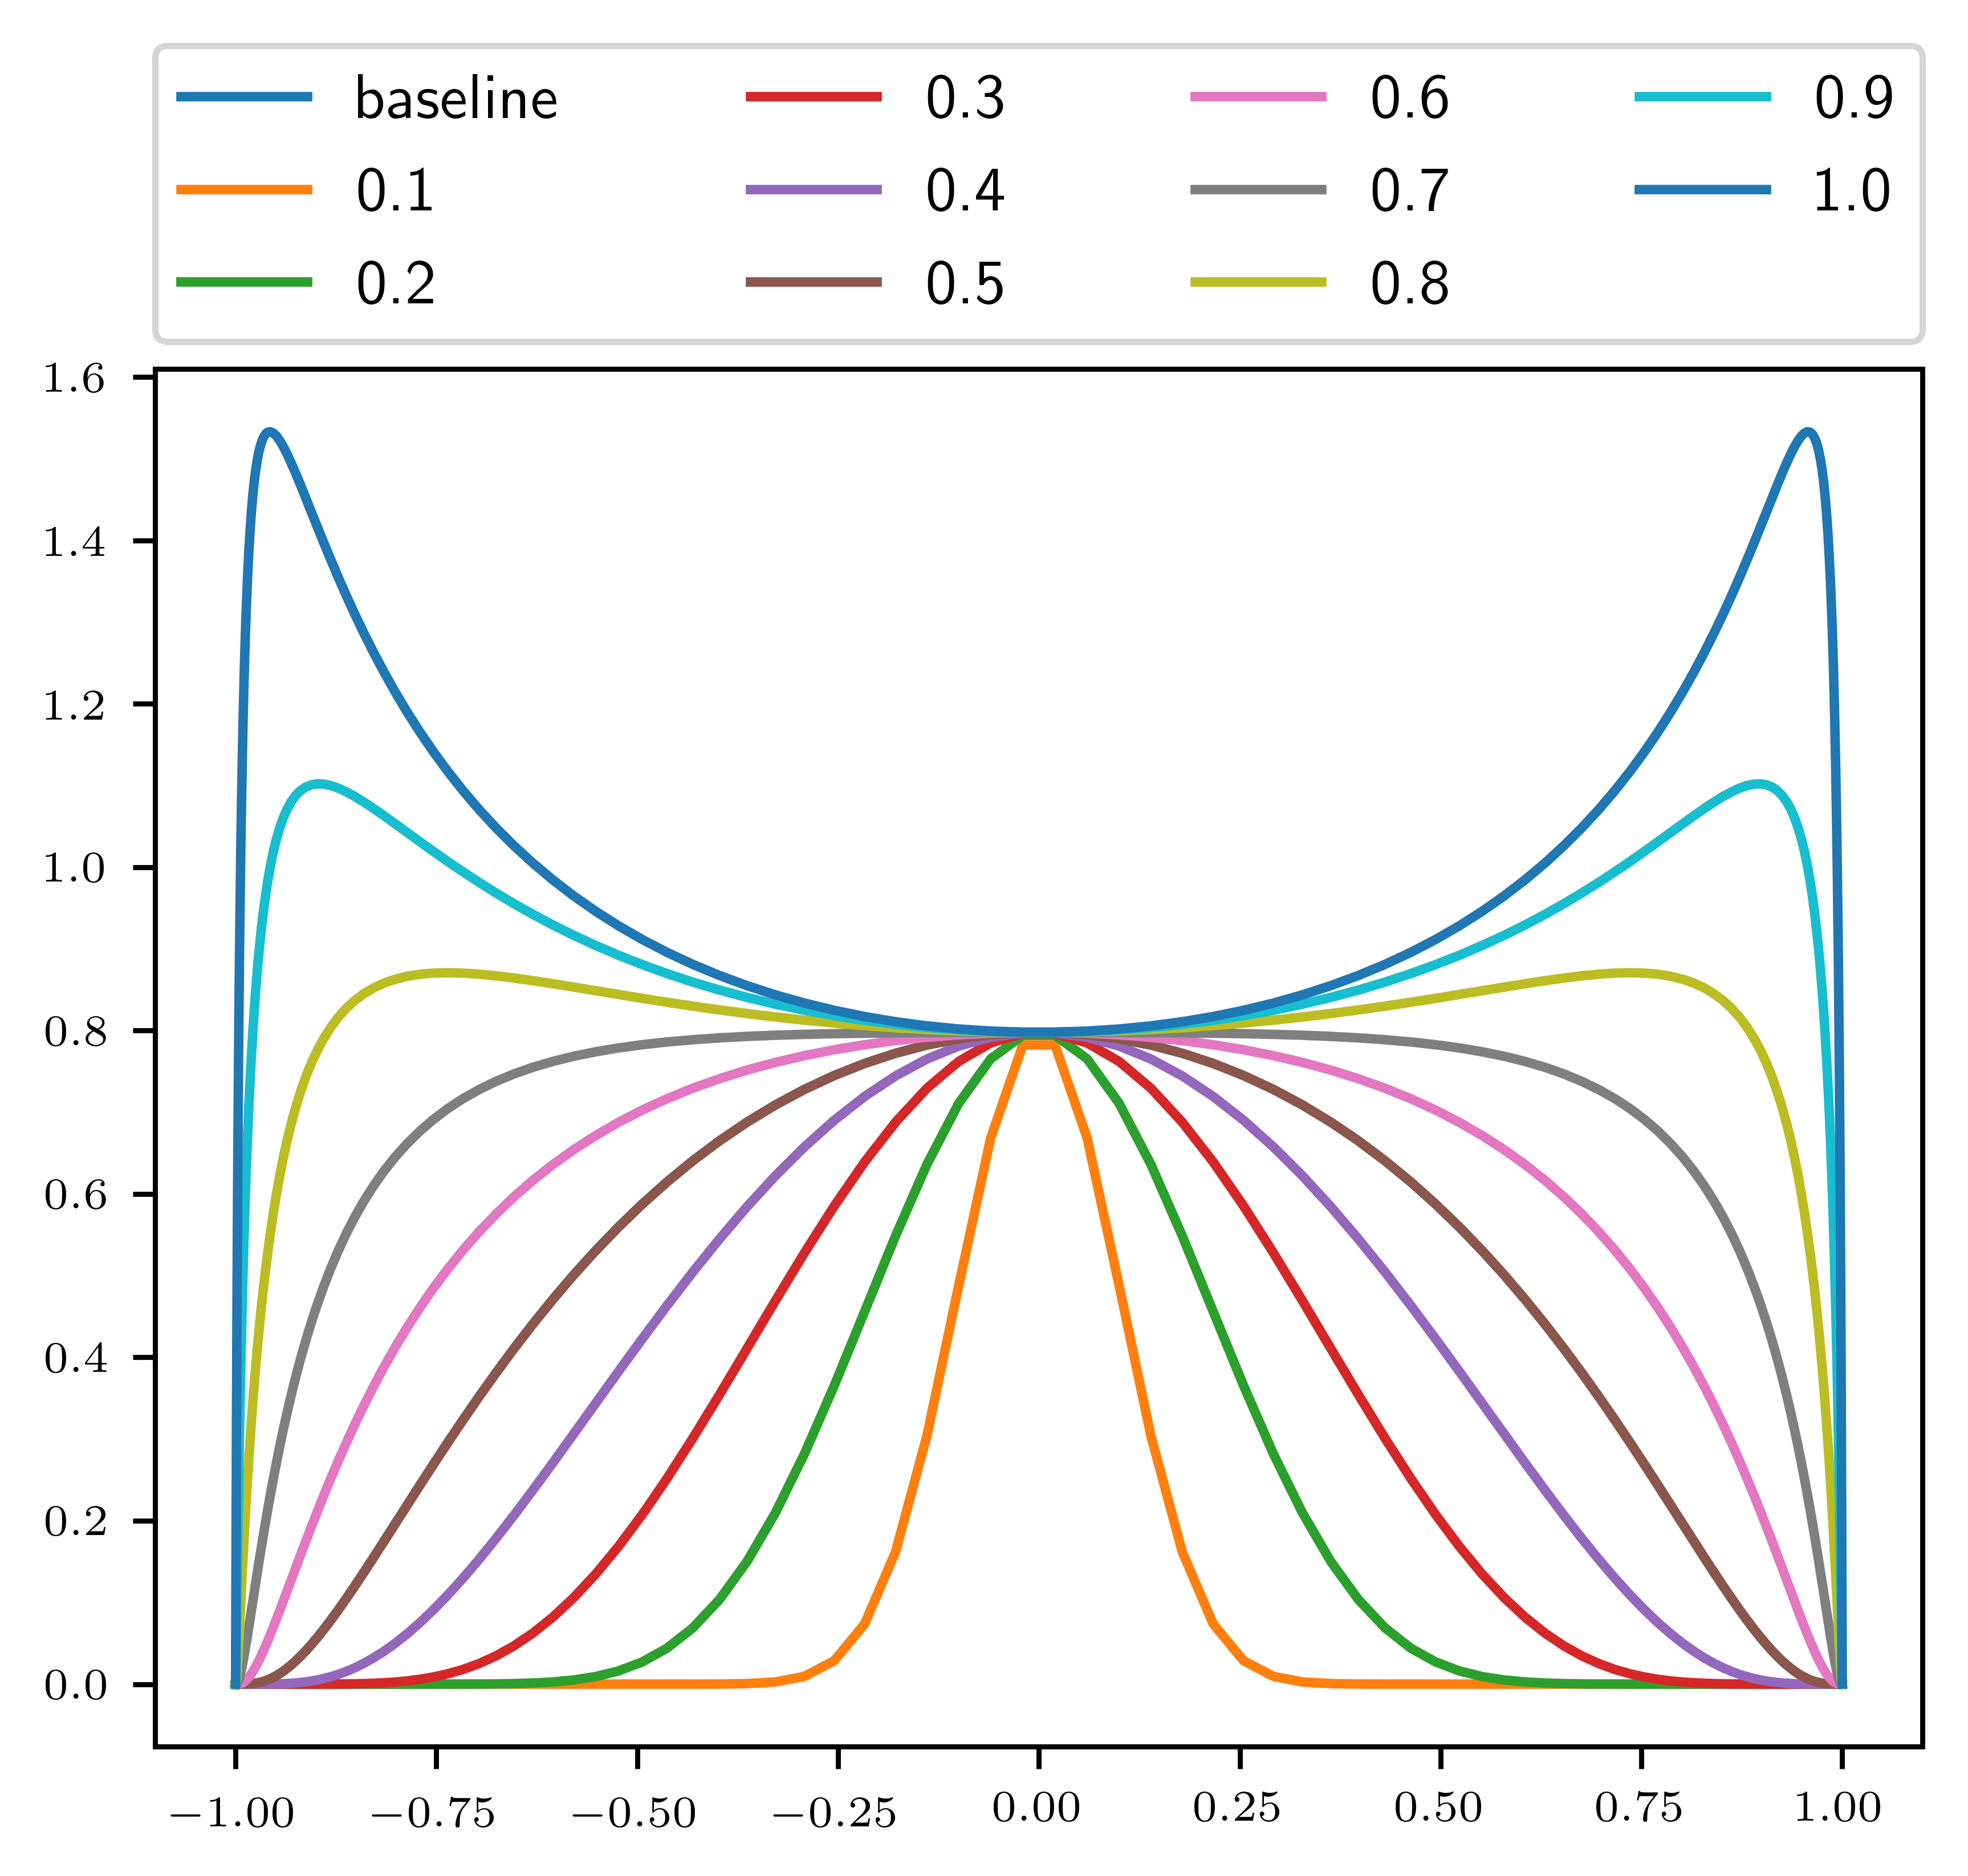

In [40]:
mu = 0
sig = 0.5

x = np.linspace(-10, 10, 500)
xt = np.tanh(x)
p = np.exp(-1/2*((x-mu)/sig)**2) / sig / np.sqrt(2*np.pi) / (1-np.tanh(x)**2)

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(xt, p, label="baseline")
for i in range(10):
    sig_temp = round(sig - 0.4 + 0.1 * i, 1)
    
    p_2 = np.exp(-1/2*((x-mu)/sig_temp)**2) / sig / np.sqrt(2*np.pi) / (1-np.tanh(x)**2)
    ax.plot(xt, p_2, label=sig_temp)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=font_size)

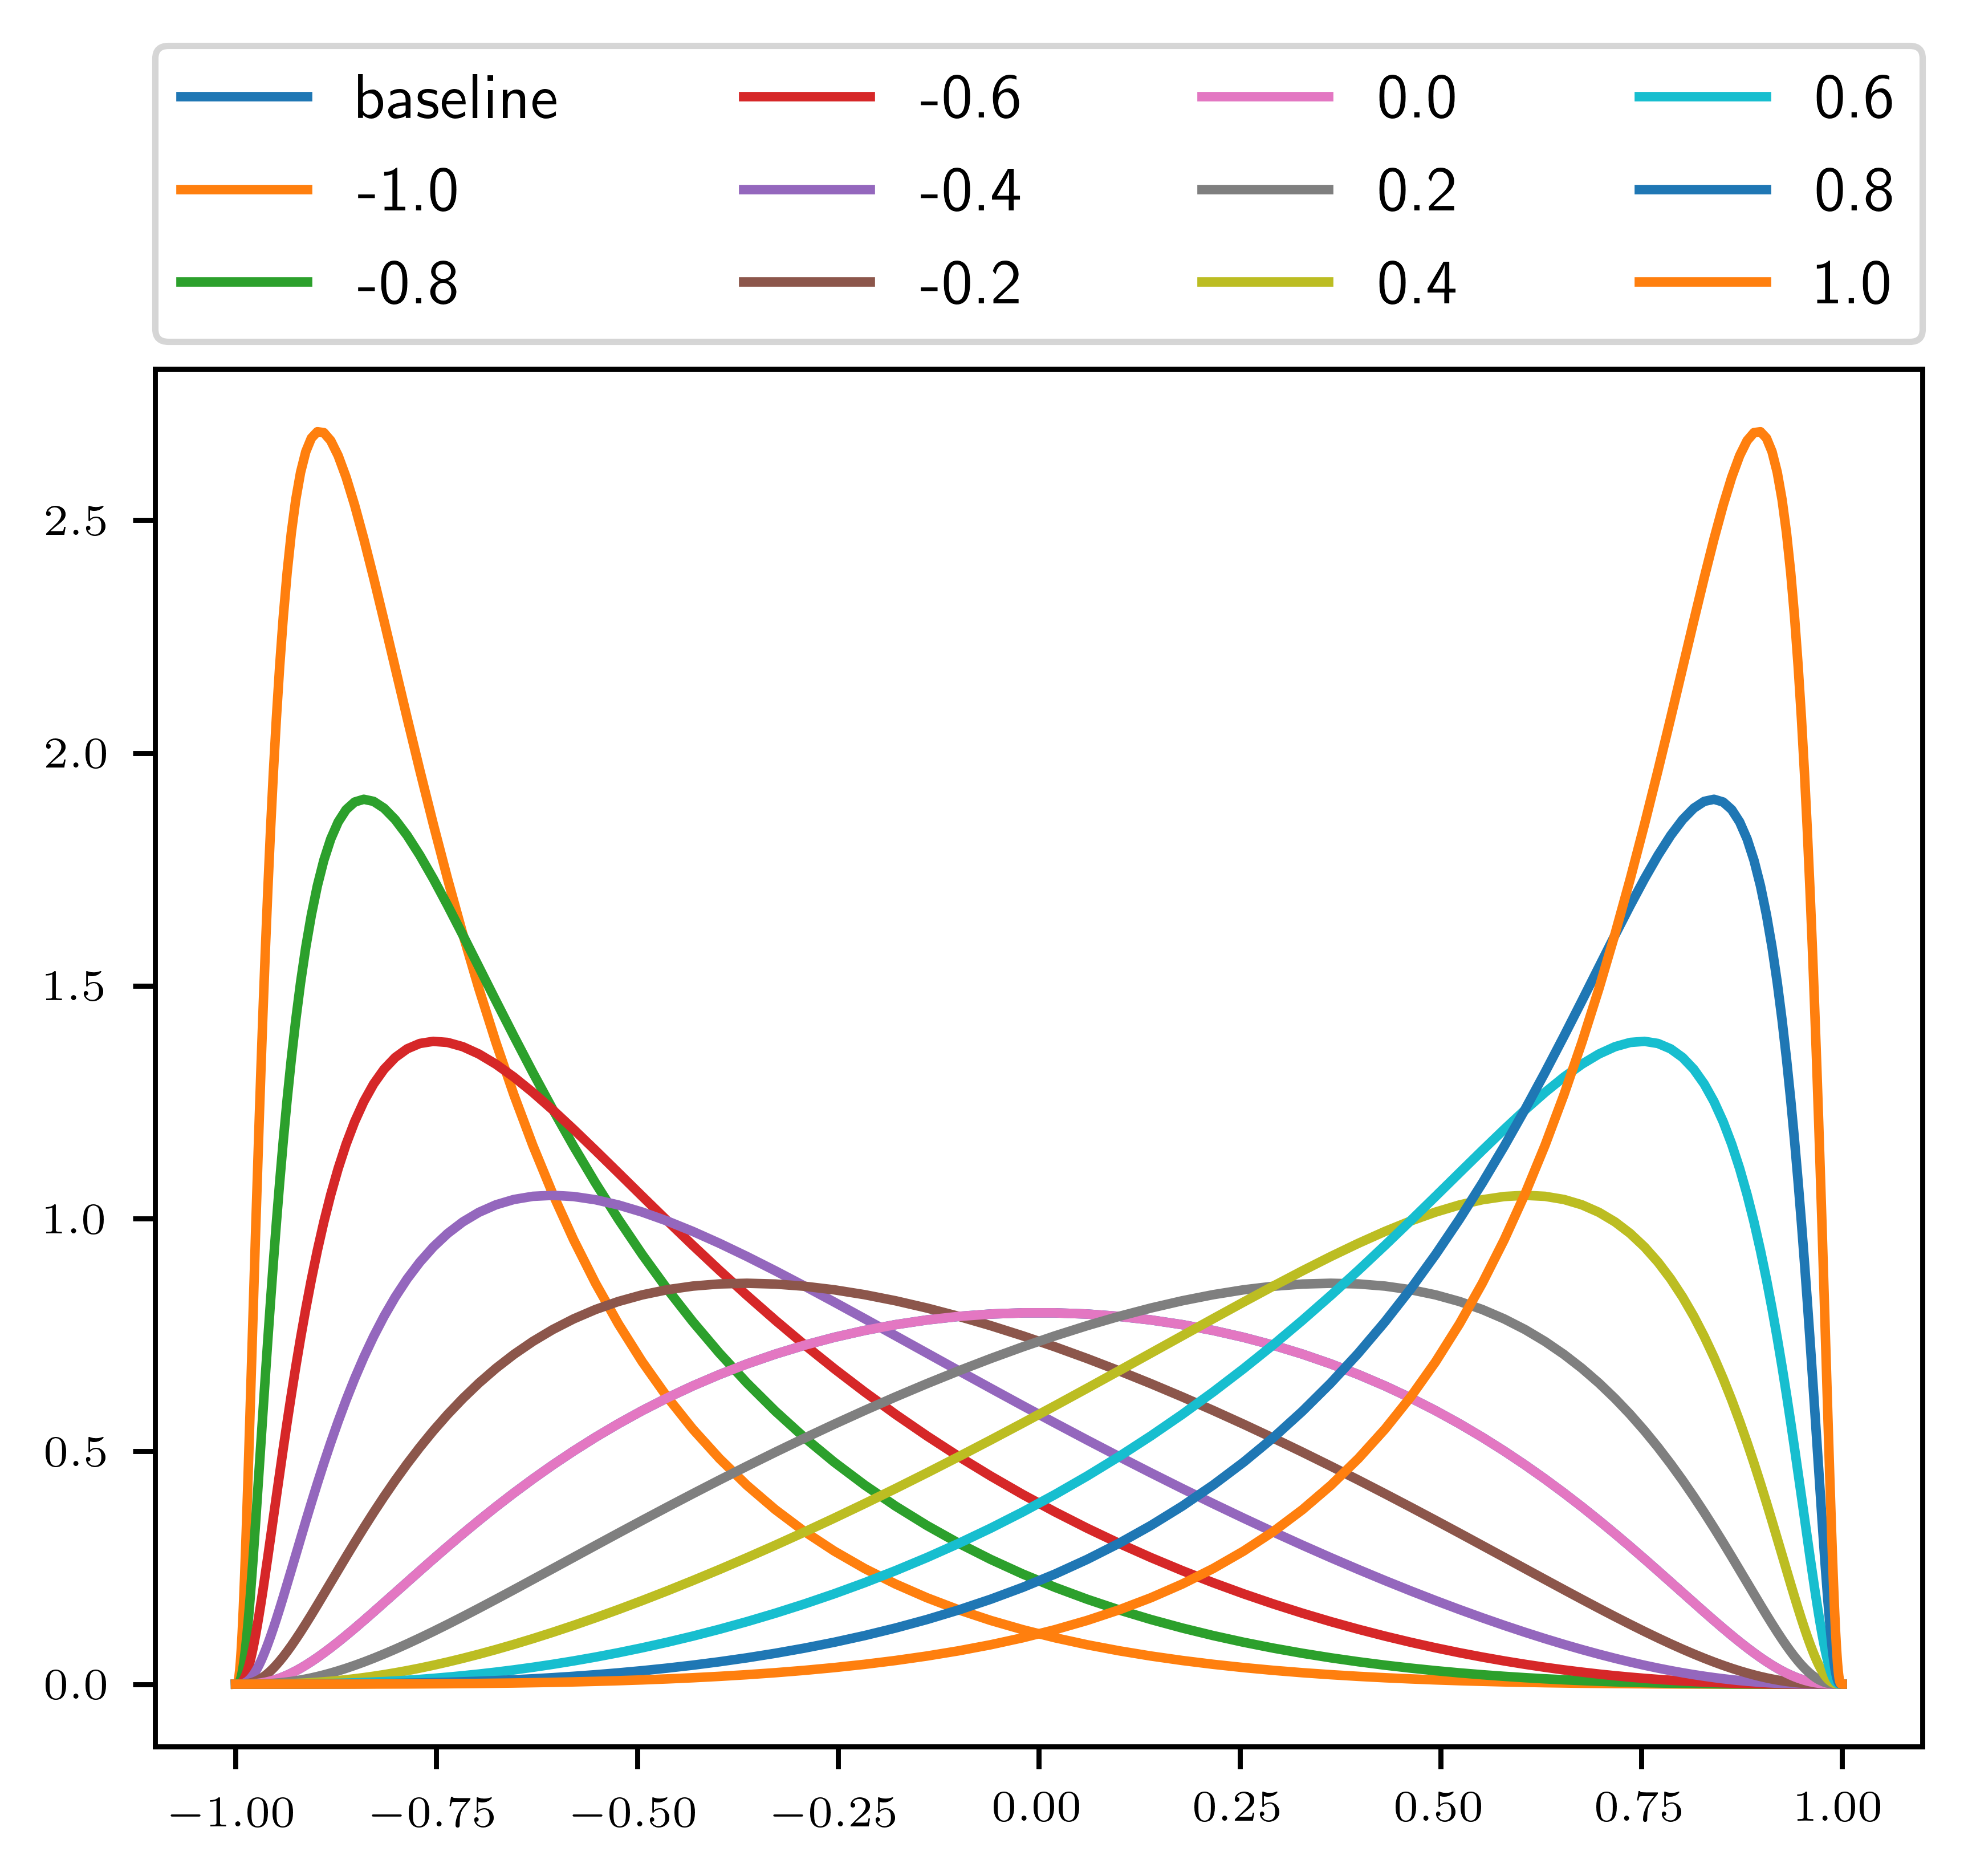

In [41]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(xt, p, label="baseline")
for i in range(11):
    mu_temp = round(mu - 1 + 0.2 * i, 1)
    
    p_2 = np.exp(-1/2*((x-mu_temp)/sig)**2) / sig / np.sqrt(2*np.pi) / (1-np.tanh(x)**2)
    ax.plot(xt, p_2, label=mu_temp)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0., fontsize=font_size)

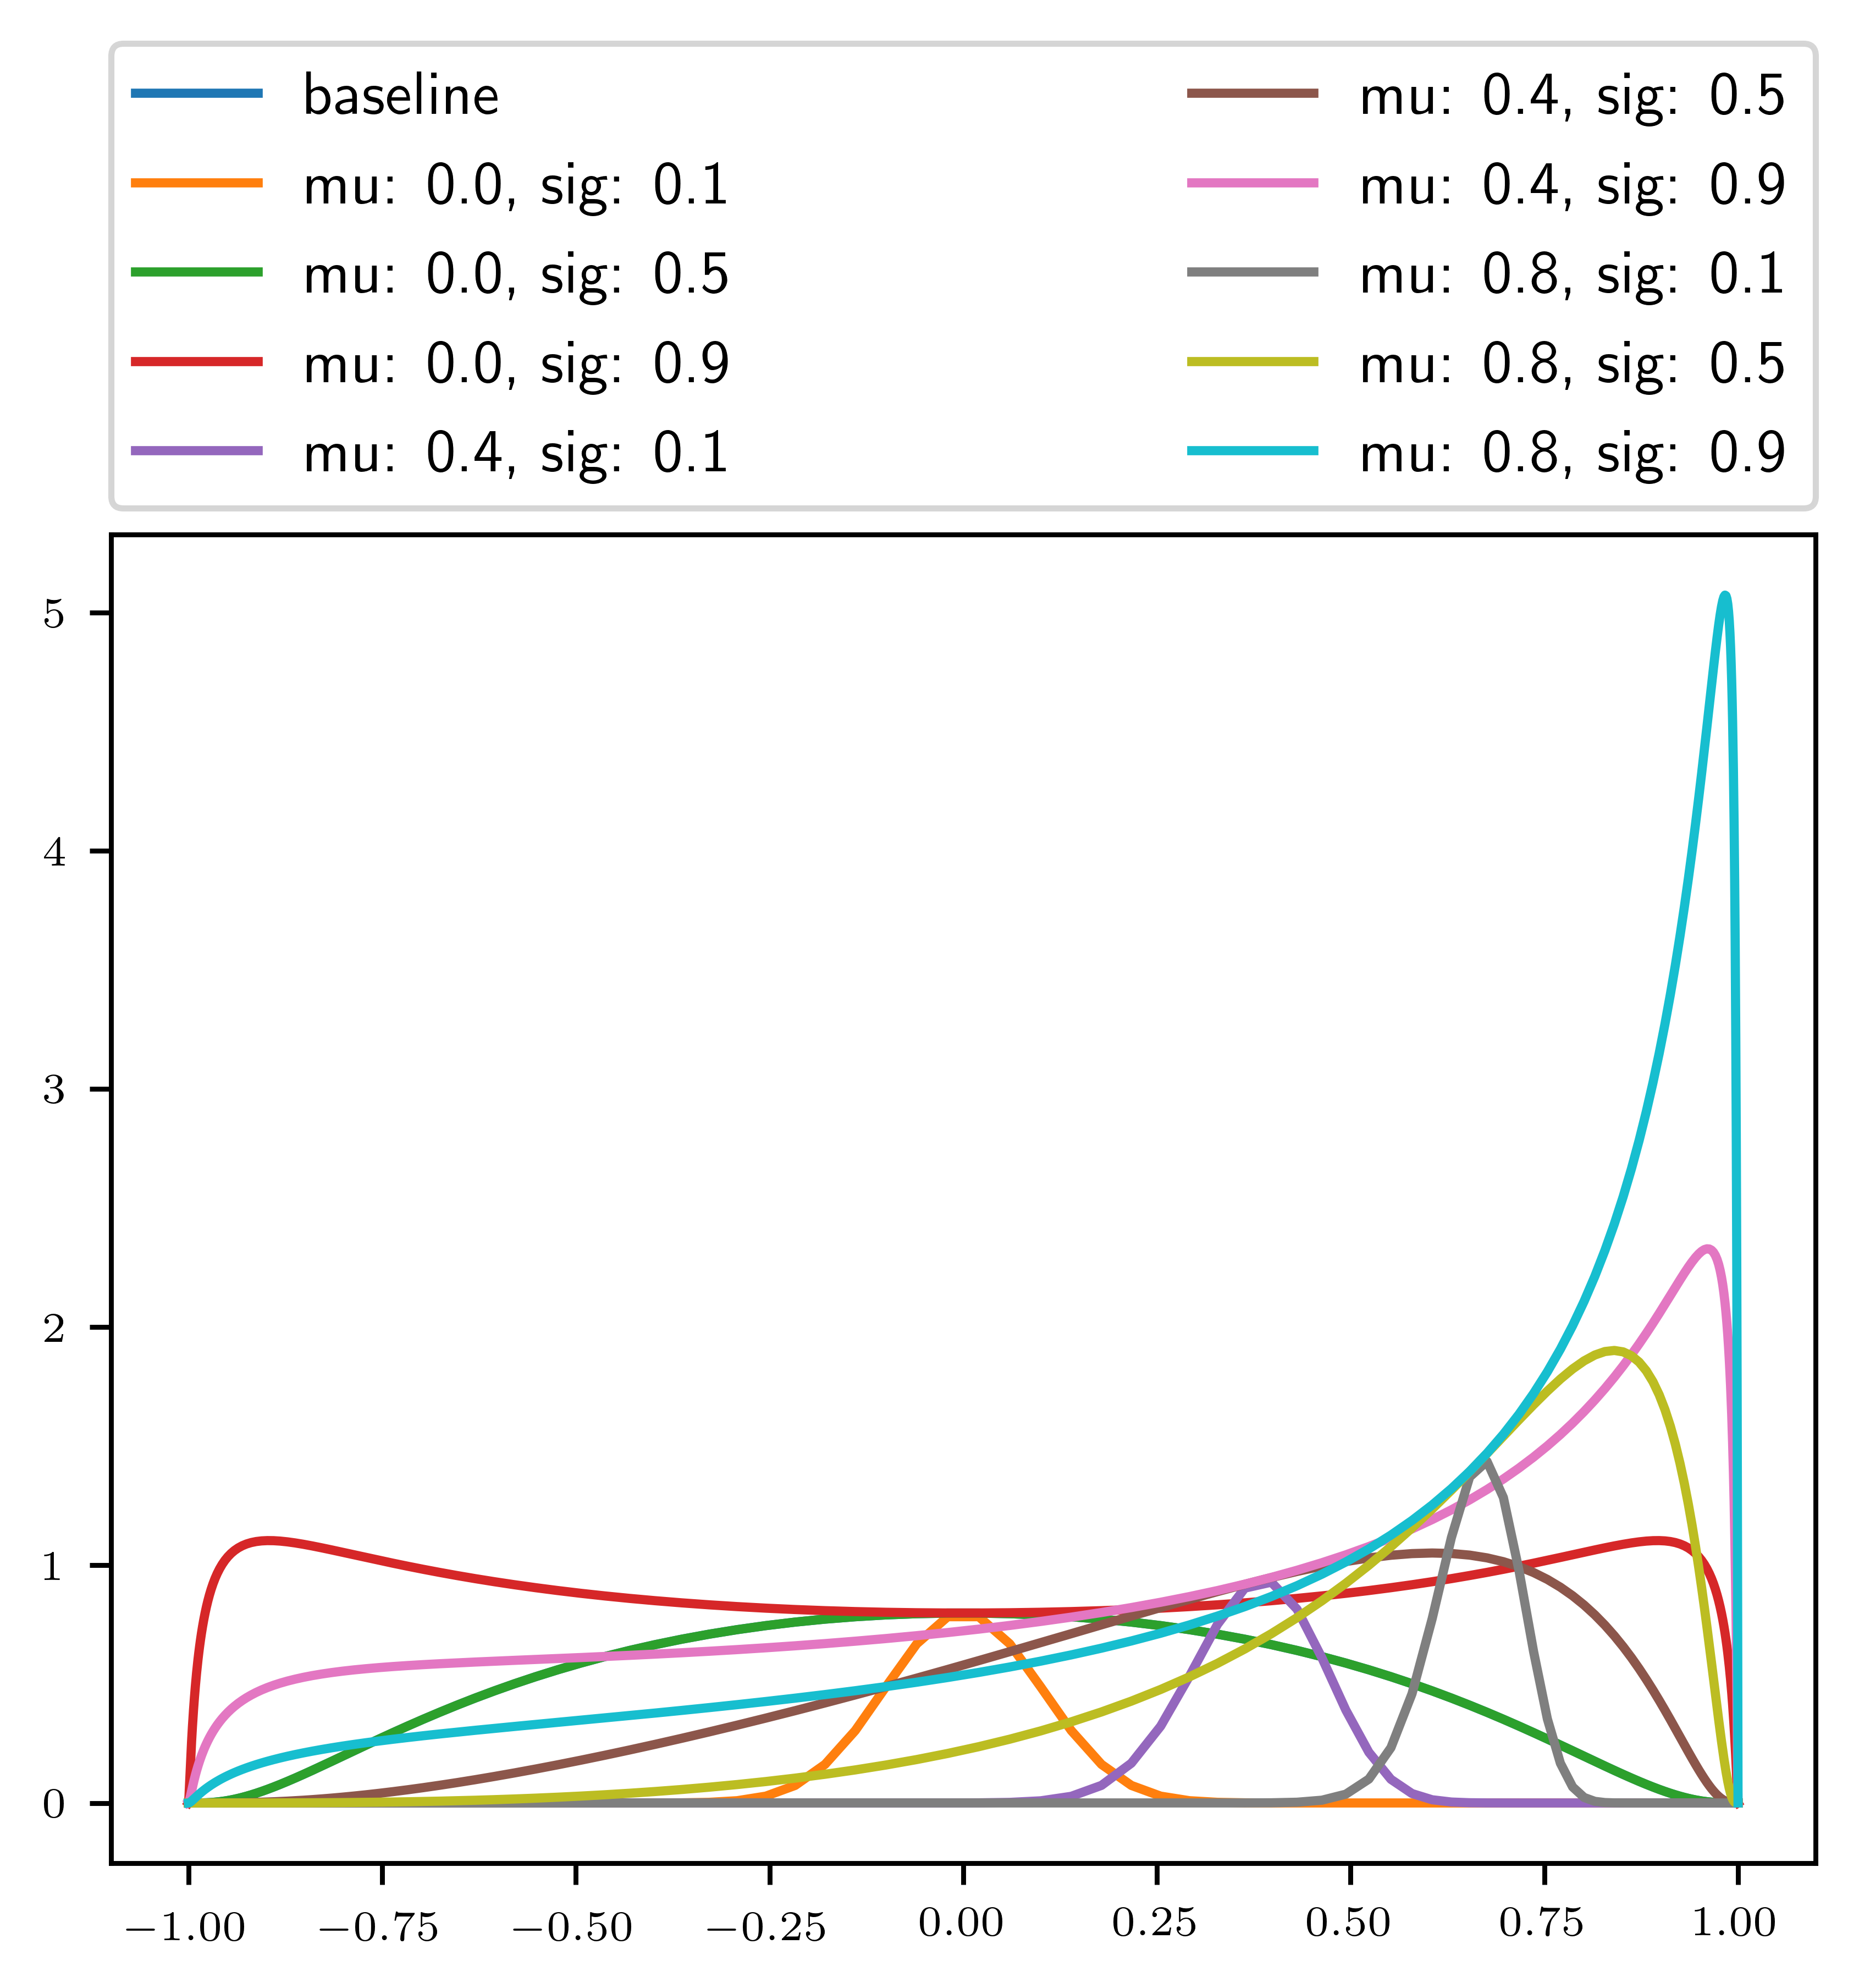

In [42]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(xt, p, label="baseline")
for i in range(3):
    mu_temp = round(mu + 0.4 * i, 1)
    for j in range(3):
        sig_temp = round(sig - 0.4 + 0.4 * j, 1)
        p_2 = np.exp(-1/2*((x-mu_temp)/sig_temp)**2) / sig / np.sqrt(2*np.pi) / (1-np.tanh(x)**2)
        ax.plot(xt, p_2, label=f"mu: {mu_temp}, sig: {sig_temp}")
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., fontsize=font_size)